The RNN had a problem about what to remember and what to forget and when to do so, it has no concept of forgetting. Thus, LSTM came into being, that utilizes the forget technique.

LSTM utilizes the 'forget gate' concept. RNN fails over huge text data, but LSTM prediction is consistent even in huge text data.

#Forget Gate
It is the first step to decide, whether we should keep the information from the previous time step or to forget it.

#Input Gate
The input gate is used to quantify the importance of the new iinformation carried by the input.

#New Information
Now the new information that is needed to be passed to the cell state is a function of a hidden state at the previous timestamp (t-1) and input x at timestamp t.

In [ ]:
#forget layer and output layer can have different activations
#recurrent state is the next state, thus recurrent dropout is applied to the next epoch as additional
#'128'-> inside the LSTM model, there will be 128 connections

#importing different packages
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding


In [ ]:
# Set the maximum number of words to use in the vocabulary, from the dataset
max_features = 10000
# Load the IMDb dataset
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

17464789/17464789 [==============================] - 0s 0us/step


In [ ]:
maxlen = 100
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

#'max_len'-> tells how many sentences to be read and stored in the array at one time
#'pad_sequence'-> transforms a list (of length num_samples ) of sequences (lists of integers) into a 2D Numpy array of shape (num_samples, num_timesteps)
#'pad_sequence'-> samples are each words, time_stamps are the relating the words in each sentence sequence

In [ ]:
# Define the LSTM model
model = Sequential()
model.add(Embedding(max_features, 128, input_length=maxlen))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

#forget layer and output layer can have different activations
#recurrent state is the next state, thus recurrent dropout is applied to the next epoch as additional
#'128'-> inside the LSTM model, there will be 128 connections
#in the end we want only one output, thus 1 connection only

In [ ]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Train the model
h=model.fit(x_train, y_train, epochs=10, batch_size=128,validation_data=(x_test, y_test))


Epoch 1/10
196/196 [==============================] - 98s 501ms/step - loss: 0.0460 - accuracy: 0.9844 - val_loss: 0.8346 - val_accuracy: 0.8195
Epoch 2/10
196/196 [==============================] - 96s 488ms/step - loss: 0.0403 - accuracy: 0.9871 - val_loss: 0.7762 - val_accuracy: 0.8209
Epoch 3/10
196/196 [==============================] - 98s 498ms/step - loss: 0.0267 - accuracy: 0.9924 - val_loss: 0.9158 - val_accuracy: 0.8238
Epoch 4/10
196/196 [==============================] - 97s 497ms/step - loss: 0.0340 - accuracy: 0.9896 - val_loss: 1.1171 - val_accuracy: 0.8181
Epoch 5/10
196/196 [==============================] - 91s 465ms/step - loss: 0.0318 - accuracy: 0.9902 - val_loss: 1.0367 - val_accuracy: 0.8165
Epoch 6/10
196/196 [==============================] - 96s 492ms/step - loss: 0.0305 - accuracy: 0.9905 - val_loss: 0.8332 - val_accuracy: 0.8200
Epoch 7/10
196/196 [==============================] - 92s 469ms/step - loss: 0.0324 - accuracy: 0.9897 - val_loss: 0.9054 - val_ac

In [ ]:
model.save('lstm1.h5')

#save the model as future version to be used for testing

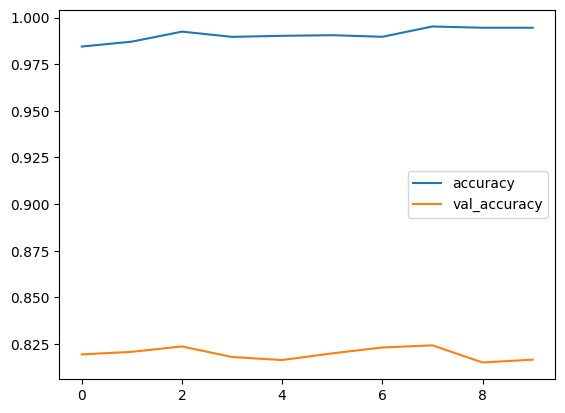

In [ ]:
import matplotlib.pyplot as plt

plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'])
plt.show()

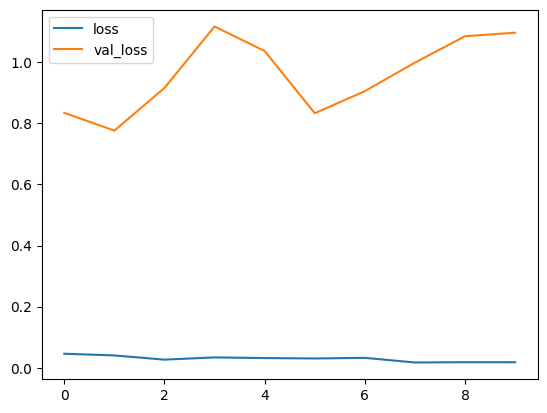

In [ ]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.show()